# Project 2

In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

In [59]:
djia = (
    pd.read_csv(
        filepath_or_buffer='data_djia.csv',
        index_col=['Ticker', 'Date'],
        parse_dates=['Date']
    )
    .sort_index()
    .rename_axis(columns=['Variable'])
)

In [60]:
ff3 = (
    pd.read_csv(
        filepath_or_buffer='data_ff3.csv',
        index_col=['Date'],
        parse_dates=['Date']
    )
    .sort_index()
    .rename_axis(columns=['Variable'])
)

# Implementation and Backtesting of a 52-week high/low breakout strategy

In [61]:
# Load data
djia_data = pd.read_csv("data_djia.csv", parse_dates=["Date"])
ff3_data = pd.read_csv("data_ff3.csv", parse_dates=["Date"])

# Convert column names to lowercase
djia_data.columns = djia_data.columns.str.lower()
ff3_data.columns = ff3_data.columns.str.lower()

# Sort data by ticker and date
djia_data = djia_data.sort_values(by=['ticker', 'date'])

# Display first few rows
djia_data.head(), ff3_data.head()


(          date ticker  adj close     close      high       low      open  \
 0   1998-01-20   AAPL   0.143415  0.170201  0.172433  0.166295  0.170201   
 31  1998-01-21   AAPL   0.142239  0.168806  0.170201  0.165737  0.167411   
 62  1998-01-22   AAPL   0.144825  0.171875  0.176339  0.166295  0.166853   
 93  1998-01-23   AAPL   0.146706  0.174107  0.175781  0.171875  0.172991   
 124 1998-01-26   AAPL   0.146236  0.173549  0.174665  0.167969  0.173549   
 
           volume  
 0    241561600.0  
 31   190209600.0  
 62   329728000.0  
 93   233161600.0  
 124  146440000.0  ,
         date  mkt-rf   smb   hml     rf
 0 1998-01-20    1.63 -0.33 -0.94  0.021
 1 1998-01-21   -0.66  0.25  0.25  0.021
 2 1998-01-22   -0.80  0.01  0.49  0.021
 3 1998-01-23   -0.56  0.32 -0.23  0.021
 4 1998-01-26   -0.25 -0.69  0.52  0.021)

In [62]:
# Changing the adj close column to adj_close

if 'adj close' in djia_data.columns:
    djia_data.rename(columns={'adj close': 'adj_close'}, inplace=True)

In [63]:
djia_data.groupby('ticker').head()

,date,ticker,adj_close,close,high,low,open,volume
0,1998-01-20,AAPL,0.143415,0.170201,0.172433,0.166295,0.170201,241561600.0
31,1998-01-21,AAPL,0.142239,0.168806,0.170201,0.165737,0.167411,190209600.0
62,1998-01-22,AAPL,0.144825,0.171875,0.176339,0.166295,0.166853,329728000.0
93,1998-01-23,AAPL,0.146706,0.174107,0.175781,0.171875,0.172991,233161600.0
124,1998-01-26,AAPL,0.146236,0.173549,0.174665,0.167969,0.173549,146440000.0
...,...,...,...,...,...,...,...,...
30,1998-01-20,WMT,4.441517,6.958333,6.989583,6.593750,6.593750,23048400.0
61,1998-01-21,WMT,4.328484,6.781250,6.885417,6.666667,6.843750,18490200.0
92,1998-01-22,WMT,4.255347,6.666667,6.729167,6.562500,6.687500,17223600.0
123,1998-01-23,WMT,4.202155,6.583333,6.697917,6.458333,6.687500,14755200.0


In [64]:
# Calculate 52-week high and low
djia_data['52_week_high'] = djia_data.groupby('ticker')['adj_close'].rolling(window=252).max().reset_index(0, drop=True)
djia_data['52_week_low'] = djia_data.groupby('ticker')['adj_close'].rolling(window=252).min().reset_index(0, drop=True)

# Create buy/sell signal columns
djia_data['buy'] = (djia_data['adj_close'] > djia_data['52_week_high'].shift(1))
djia_data['sell'] = (djia_data['adj_close'] < djia_data['52_week_low'].shift(1))

# Check if signals are generated correctly
print(djia_data[['date', 'ticker', 'adj_close', 'buy', 'sell']].head())


          date ticker  adj_close    buy   sell
0   1998-01-20   AAPL   0.143415  False  False
31  1998-01-21   AAPL   0.142239  False  False
62  1998-01-22   AAPL   0.144825  False  False
93  1998-01-23   AAPL   0.146706  False  False
124 1998-01-26   AAPL   0.146236  False  False


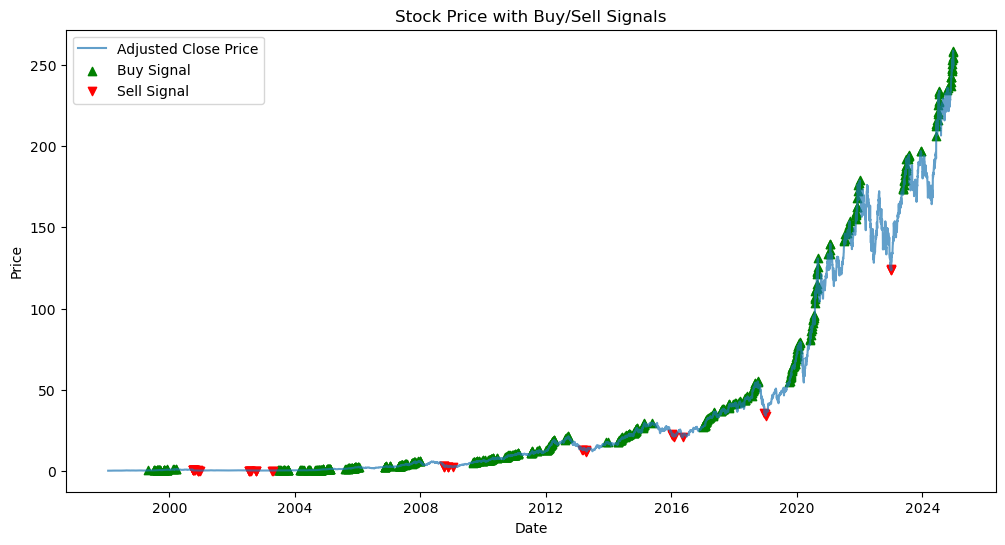

In [65]:
import matplotlib.pyplot as plt
# Sample signal data assuming 'buy' and 'sell' columns are boolean
ticker_data = djia_data[djia_data['ticker'] == 'AAPL']  # Replace 'AAPL' with any ticker

plt.figure(figsize=(12, 6))
plt.plot(ticker_data['date'], ticker_data['adj_close'], label='Adjusted Close Price', alpha=0.7)
plt.scatter(ticker_data['date'][ticker_data['buy']], ticker_data['adj_close'][ticker_data['buy']],
            marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(ticker_data['date'][ticker_data['sell']], ticker_data['adj_close'][ticker_data['sell']],
            marker='v', color='r', label='Sell Signal', alpha=1)
plt.title('Stock Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Compute 52-week high/low and 20-day SMA of volume

In [66]:
djia_data['52_week_high'] = djia_data.groupby('ticker')['adj_close'].rolling(window=252).max().reset_index(level=0, drop=True)
djia_data['52_week_low'] = djia_data.groupby('ticker')['adj_close'].rolling(window=252).min().reset_index(level=0, drop=True)
djia_data['volume_sma_20'] = djia_data.groupby('ticker')['adj_close'].rolling(window=20).mean().reset_index(level=0, drop=True)

# Display processed data
djia_data.head()

,date,ticker,adj_close,close,high,low,open,volume,52_week_high,52_week_low,buy,sell,volume_sma_20
0,1998-01-20,AAPL,0.143415,0.170201,0.172433,0.166295,0.170201,241561600.0,NaN,NaN,False,False,NaN
31,1998-01-21,AAPL,0.142239,0.168806,0.170201,0.165737,0.167411,190209600.0,NaN,NaN,False,False,NaN
62,1998-01-22,AAPL,0.144825,0.171875,0.176339,0.166295,0.166853,329728000.0,NaN,NaN,False,False,NaN
93,1998-01-23,AAPL,0.146706,0.174107,0.175781,0.171875,0.172991,233161600.0,NaN,NaN,False,False,NaN
124,1998-01-26,AAPL,0.146236,0.173549,0.174665,0.167969,0.173549,146440000.0,NaN,NaN,False,False,NaN


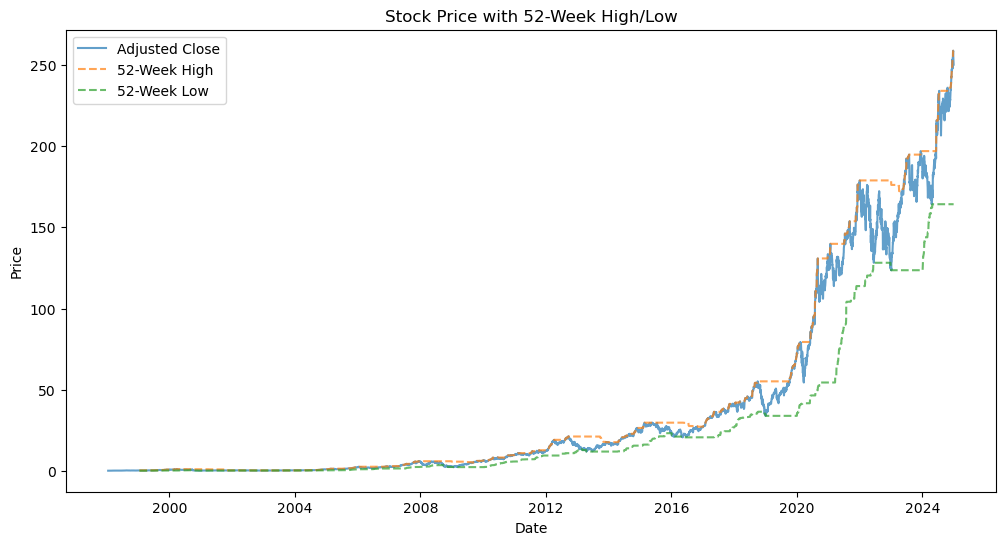

In [67]:
import matplotlib.pyplot as plt

# Plot for a specific ticker (e.g., AAPL)
ticker_data = djia_data[djia_data['ticker'] == 'AAPL']

plt.figure(figsize=(12, 6))
plt.plot(ticker_data['date'], ticker_data['adj_close'], label='Adjusted Close', alpha=0.7)
plt.plot(ticker_data['date'], ticker_data['52_week_high'], linestyle='--', label='52-Week High', alpha=0.7)
plt.plot(ticker_data['date'], ticker_data['52_week_low'], linestyle='--', label='52-Week Low', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with 52-Week High/Low')
plt.legend()
plt.show()


In [68]:
ticker_data.head()

,date,ticker,adj_close,close,high,low,open,volume,52_week_high,52_week_low,buy,sell,volume_sma_20
0,1998-01-20,AAPL,0.143415,0.170201,0.172433,0.166295,0.170201,241561600.0,NaN,NaN,False,False,NaN
31,1998-01-21,AAPL,0.142239,0.168806,0.170201,0.165737,0.167411,190209600.0,NaN,NaN,False,False,NaN
62,1998-01-22,AAPL,0.144825,0.171875,0.176339,0.166295,0.166853,329728000.0,NaN,NaN,False,False,NaN
93,1998-01-23,AAPL,0.146706,0.174107,0.175781,0.171875,0.172991,233161600.0,NaN,NaN,False,False,NaN
124,1998-01-26,AAPL,0.146236,0.173549,0.174665,0.167969,0.173549,146440000.0,NaN,NaN,False,False,NaN


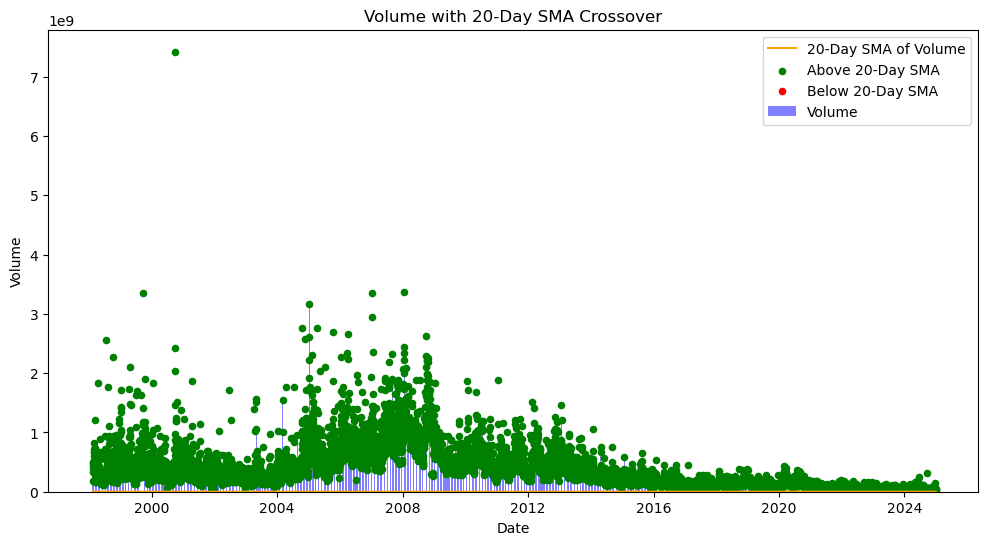

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(ticker_data['date'], ticker_data['volume'], label='Volume', alpha=0.5, color='blue')
plt.plot(ticker_data['date'], ticker_data['volume_sma_20'], label='20-Day SMA of Volume', color='orange')

# Highlight where volume crosses above/below SMA
above_sma = ticker_data[ticker_data['volume'] > ticker_data['volume_sma_20']]
below_sma = ticker_data[ticker_data['volume'] <= ticker_data['volume_sma_20']]

plt.scatter(above_sma['date'], above_sma['volume'], color='green', label='Above 20-Day SMA', s=20)
plt.scatter(below_sma['date'], below_sma['volume'], color='red', label='Below 20-Day SMA', s=20)

plt.title('Volume with 20-Day SMA Crossover')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


# Definition and Display of trade signals

In [70]:
djia_data['long_entry'] = (djia_data['adj_close'] >= djia_data['52_week_high']) & (djia_data['volume'] > 1.5 * djia_data['volume_sma_20'])
djia_data['short_entry'] = (djia_data['adj_close'] <= djia_data['52_week_low']) & (djia_data['volume'] > 1.5 * djia_data['volume_sma_20'])
djia_data['long_exit_price'] = djia_data['adj_close'] * 0.95
djia_data['short_exit_price'] = djia_data['adj_close'] * 1.05

# Display trade signals
djia_data[['date', 'ticker', 'long_entry', 'short_entry']].head()

,date,ticker,long_entry,short_entry
0,1998-01-20,AAPL,False,False
31,1998-01-21,AAPL,False,False
62,1998-01-22,AAPL,False,False
93,1998-01-23,AAPL,False,False
124,1998-01-26,AAPL,False,False


In [71]:
ff3_data

,date,mkt-rf,smb,hml,rf
0,1998-01-20,1.63,-0.33,-0.94,0.021
1,1998-01-21,-0.66,0.25,0.25,0.021
2,1998-01-22,-0.80,0.01,0.49,0.021
3,1998-01-23,-0.56,0.32,-0.23,0.021
4,1998-01-26,-0.25,-0.69,0.52,0.021
...,...,...,...,...,...
6777,2024-12-24,1.11,-0.09,-0.05,0.017
6778,2024-12-26,0.02,1.04,-0.19,0.017
6779,2024-12-27,-1.17,-0.66,0.56,0.017
6780,2024-12-30,-1.09,0.12,0.74,0.017


# Implementation of 52-week high/low breakout strategy against a passive buy-and-hold

In [72]:
# Load data
djia_data = pd.read_csv("data_djia.csv", parse_dates=["Date"])
ff3_data = pd.read_csv("data_ff3.csv", parse_dates=["Date"])
djia_data.columns = djia_data.columns.str.lower()
djia_data.rename(columns={"adj close": "adj_close"}, inplace=True)
djia_data.sort_values(by=["ticker", "date"], inplace=True)

In [73]:
djia_data

,date,ticker,adj_close,close,high,low,open,volume
0,1998-01-20,AAPL,0.143415,0.170201,0.172433,0.166295,0.170201,241561600.0
31,1998-01-21,AAPL,0.142239,0.168806,0.170201,0.165737,0.167411,190209600.0
62,1998-01-22,AAPL,0.144825,0.171875,0.176339,0.166295,0.166853,329728000.0
93,1998-01-23,AAPL,0.146706,0.174107,0.175781,0.171875,0.172991,233161600.0
124,1998-01-26,AAPL,0.146236,0.173549,0.174665,0.167969,0.173549,146440000.0
...,...,...,...,...,...,...,...,...
210117,2024-12-24,WMT,92.680000,92.680000,92.680000,90.349998,90.370003,8992400.0
210148,2024-12-26,WMT,92.790001,92.790001,92.879997,92.169998,92.540001,10994000.0
210179,2024-12-27,WMT,91.660004,91.660004,92.349998,91.029999,92.129997,11384400.0
210210,2024-12-30,WMT,90.570000,90.570000,91.070000,90.129997,90.730003,9790200.0


In [74]:
# Strategy function
def apply_breakout_strategy(df):
    df = df.copy()
    df['52w_high'] = df['adj_close'].rolling(252).max()
    df['52w_low'] = df['adj_close'].rolling(252).min()
    df['20d_vol'] = df['volume'].rolling(20).mean()

    df['long_entry'] = (df['adj_close'] >= df['52w_high']) & (df['volume'] > 1.5 * df['20d_vol'])
    df['short_entry'] = (df['adj_close'] <= df['52w_low']) & (df['volume'] > 1.5 * df['20d_vol'])
    df['daily_return'] = df['adj_close'].pct_change()
    df['position'] = 0

    holding = 0
    entry_price = 0
    entry_day = 0
    positions = []

    for i in range(len(df)):
        if holding == 0:
            if df.iloc[i-1]['long_entry']:
                holding = 1
                entry_price = df.iloc[i-1]['adj_close']
                entry_day = 0
            elif df.iloc[i-1]['short_entry']:
                holding = -1
                entry_price = df.iloc[i-1]['adj_close']
                entry_day = 0
        else:
            entry_day += 1
            price = df.iloc[i-1]['adj_close']
            if holding == 1 and (price <= 0.95 * entry_price or entry_day >= 20):
                holding = 0
            elif holding == -1 and (price >= 1.05 * entry_price or entry_day >= 20):
                holding = 0
        positions.append(holding)

    while len(positions) < len(df):
        positions.insert(0, 0)

    df['position'] = positions
    df['strategy_return'] = df['daily_return'] * df['position'].shift(1)
    return df

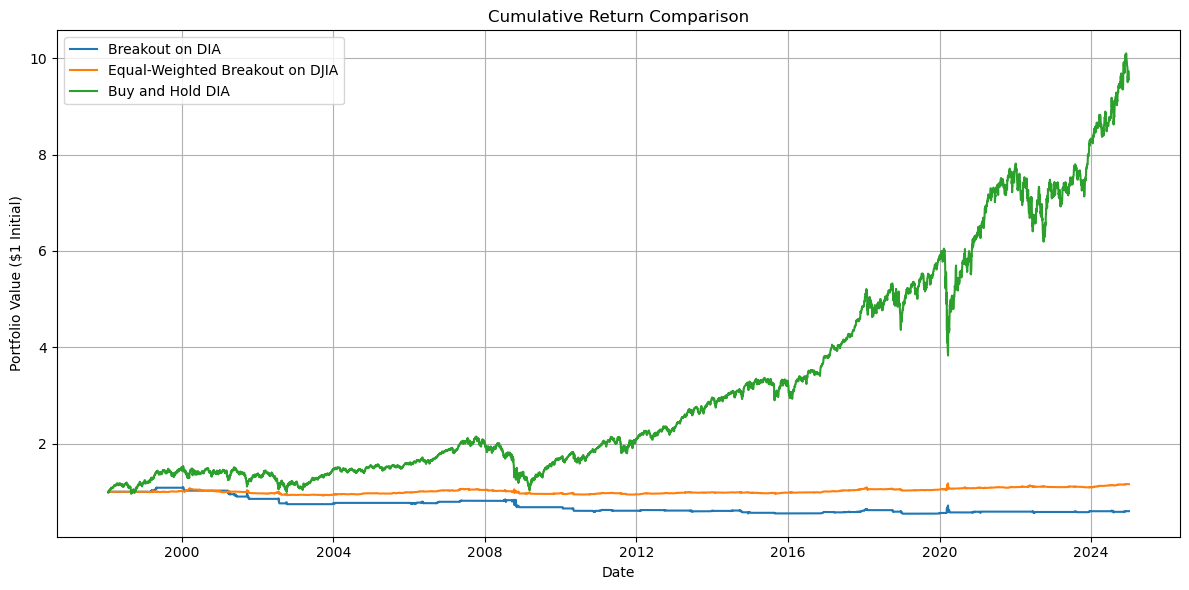

                         Total Return  Annualized Sharpe Ratio  Max Drawdown
DIA Strategy                -0.403066                -0.381971     -0.503848
Equal-Weighted Breakout      0.156979                -0.344626     -0.135792
Buy and Hold DIA             8.559295                 0.439399     -0.518684


In [75]:
# Apply to all DJIA stocks
tickers = djia_data['ticker'].unique()
all_strategies = []
for ticker in tickers:
    stock_data = djia_data[djia_data['ticker'] == ticker]
    strat_df = apply_breakout_strategy(stock_data)
    strat_df['ticker'] = ticker
    all_strategies.append(strat_df[['date', 'ticker', 'strategy_return']])

combined_df = pd.concat(all_strategies)
pivot_returns = combined_df.pivot(index="date", columns="ticker", values="strategy_return")
pivot_returns['equal_weighted'] = pivot_returns.mean(axis=1)

# DIA-specific strategy and buy-hold
dia_df = djia_data[djia_data['ticker'] == 'DIA'].copy()
dia_df = apply_breakout_strategy(dia_df)
dia_df['buy_and_hold'] = dia_df['adj_close'].pct_change()
# dia_df['breakout_ret'] = dia_df

# Combine returns
results = pd.DataFrame({
    'date': dia_df['date'],
    'DIA_strategy': dia_df['strategy_return'].values,
    'DIA_buy_hold': dia_df['buy_and_hold'].values
}).merge(pivot_returns[['equal_weighted']], on='date', how='left')

results = results.dropna()
results.set_index('date', inplace=True)
results = (1 + results).cumprod()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['DIA_strategy'], label="Breakout on DIA")
plt.plot(results.index, results['equal_weighted'], label="Equal-Weighted Breakout on DJIA")
plt.plot(results.index, results['DIA_buy_hold'], label="Buy and Hold DIA")
plt.legend()
plt.title("Cumulative Return Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($1 Initial)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Risk-free rate and metrics
ff3_data.columns = ff3_data.columns.str.lower()
ff3_data = ff3_data.loc[:, ~ff3_data.columns.duplicated()]
ff3_data['rf'] = ff3_data['rf'] / 100
ff3_data['date'] = pd.to_datetime(ff3_data['date'])

returns = results.pct_change().dropna().reset_index()
returns = returns.merge(ff3_data[['date', 'rf']], on='date', how='left').dropna()
returns.set_index('date', inplace=True)

returns['DIA_excess'] = returns['DIA_strategy'] - returns['rf']
returns['EqualWeighted_excess'] = returns['equal_weighted'] - returns['rf']
returns['BuyHold_excess'] = returns['DIA_buy_hold'] - returns['rf']

sharpe_ratios = {
    'DIA Strategy': returns['DIA_excess'].mean() / returns['DIA_excess'].std() * np.sqrt(252),
    'Equal-Weighted Breakout': returns['EqualWeighted_excess'].mean() / returns['EqualWeighted_excess'].std() * np.sqrt(252),
    'Buy and Hold DIA': returns['BuyHold_excess'].mean() / returns['BuyHold_excess'].std() * np.sqrt(252)
}

total_return = {
    'DIA Strategy': results['DIA_strategy'].iloc[-1] - 1,
    'Equal-Weighted Breakout': results['equal_weighted'].iloc[-1] - 1,
    'Buy and Hold DIA': results['DIA_buy_hold'].iloc[-1] - 1
}

def max_drawdown(series):
    peak = series.cummax()
    drawdown = (series - peak) / peak
    return drawdown.min()

max_drawdowns = {
    'DIA Strategy': max_drawdown(results['DIA_strategy']),
    'Equal-Weighted Breakout': max_drawdown(results['equal_weighted']),
    'Buy and Hold DIA': max_drawdown(results['DIA_buy_hold'])
}

summary_df = pd.DataFrame({
    'Total Return': total_return,
    'Annualized Sharpe Ratio': sharpe_ratios,
    'Max Drawdown': max_drawdowns
})

print(summary_df)

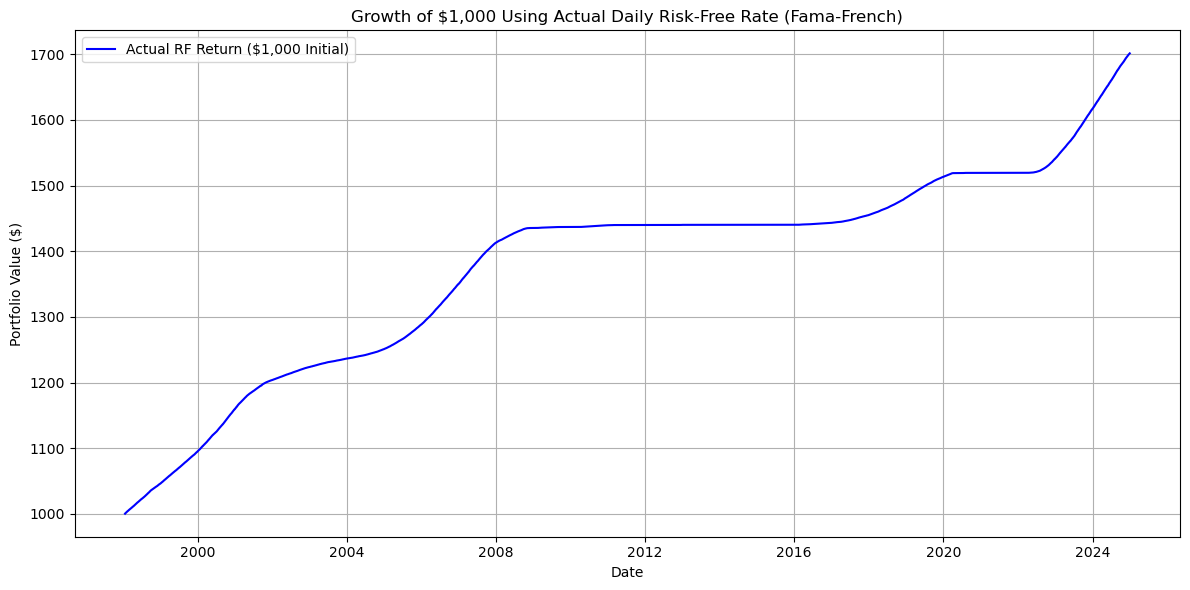

Value of $1,000 with actual risk-free rate (1998–2024): $1701.38


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Fama-French data
ff_data = pd.read_csv("data_ff3.csv", parse_dates=["Date"])
ff_data.columns = ff_data.columns.str.lower()

# Convert percentage to decimal
ff_data['rf'] = ff_data['rf'] / 100

# Sort by date (just in case)
ff_data.sort_values('date', inplace=True)

# Start with initial investment
initial_investment = 1000

# Compound the risk-free rate daily
ff_data['cum_rf'] = (1 + ff_data['rf']).cumprod() * initial_investment

# Plot the cumulative risk-free return
plt.figure(figsize=(12, 6))
plt.plot(ff_data['date'], ff_data['cum_rf'], label='Actual RF Return ($1,000 Initial)', color='blue')
plt.title('Growth of $1,000 Using Actual Daily Risk-Free Rate (Fama-French)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final value
final_value = ff_data['cum_rf'].iloc[-1]
print(f"Value of $1,000 with actual risk-free rate (1998–2024): ${final_value:.2f}")
